In [2]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
for profile in [1]:
    df_list = []
    for i in glob.glob('/home/jupyter-zyh/Gnhe/analysis_profile/global_setting/Integer/Texas/profile-{}/Texas*.csv'.format(profile)):
        rps = '0.'+i.split('.')[1]
        tmp = pd.read_csv(i)
        tmp['index'] = rps
        df_list.append(tmp)
    df = pd.concat(df_list,ignore_index=True)
    df['mae_ex_tc'] = df[['renewable_cap_0_err','renewable_cap_1_err','N_err','max_energy_err','max_power_err']].mean(axis=1)
    df.to_csv('/home/jupyter-zyh/Gnhe/analysis_profile/global_setting/Integer/Texas/profile-{}/all.csv'.format(profile),index=False)

Text(0, 0.5, 'Mean absolute error')

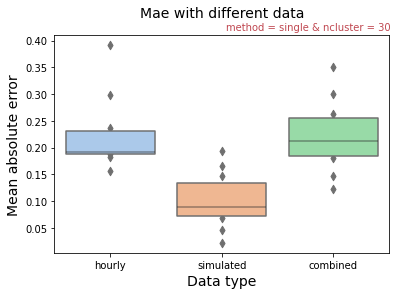

In [3]:
profile_id = 1
df = pd.read_csv('/home/jupyter-zyh/Gnhe/analysis_profile/global_setting/Integer/Texas/profile-{}/all.csv'.format(profile_id))
query_string = "method == 'single' and ncluster == 30"
p = sns.boxenplot(data=df.query(query_string),x='trial',y='mae_ex_tc',palette='pastel')
plt.title('Mae with different data',pad=18,fontdict={'size':14})
plt.text(s=query_string.replace("'","").replace("==","=").replace("and","&"),x=1.04,y=0.42,color='#c04851')
plt.xlabel('Data type',fontdict={'size':14})
plt.ylabel('Mean absolute error',fontdict={'size':14})

In [42]:
p.get_figure().savefig(
    '/home/jupyter-zyh/Gnhe/analysis/images/profile/Integer/mae_with_different_data_profile_{}_select.png'.format(profile_id),
    dpi=300)

In [13]:
df_list = []
for i in glob.glob('/home/jupyter-zyh/Gnhe/analysis_profile/global_setting/Integer/NE/NE*.csv'.format(profile)):
    index = i.split('.')[0].split('_')[-1]
    tmp = pd.read_csv(i)
    tmp['index'] = index
    df_list.append(tmp)
df = pd.concat(df_list,ignore_index=True)
df['mae_ex_tc'] = df[['renewable_cap_0_err','renewable_cap_1_err','max_energy_err','max_power_err']].mean(axis=1)
df.to_csv('/home/jupyter-zyh/Gnhe/analysis_profile/global_setting/Integer/NE/all.csv'.format(profile),index=False)

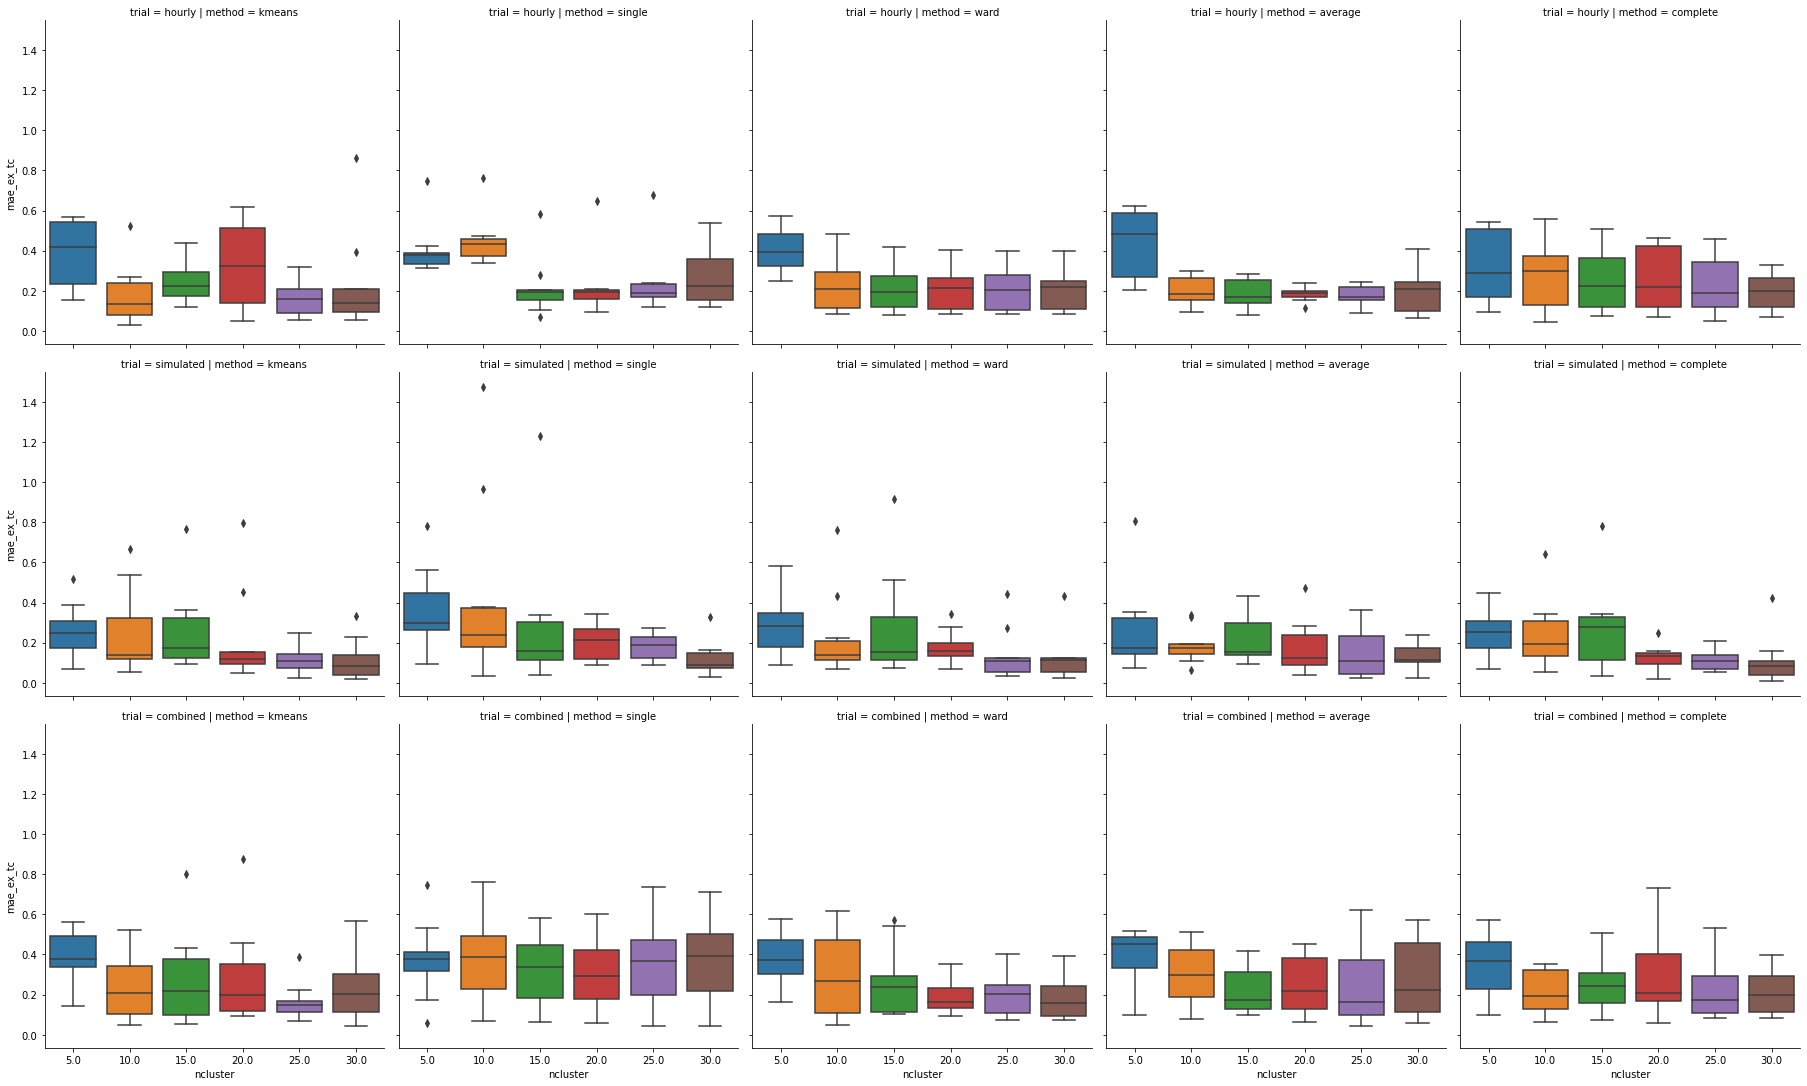

In [22]:
df = pd.read_csv('/home/jupyter-zyh/Gnhe/analysis_profile/global_setting/Integer/NE/all.csv')
p = sns.catplot(data=df,row='trial',col='method',x='ncluster',y='mae_ex_tc',kind='box')

Text(0, 0.5, 'Mean absolute error')

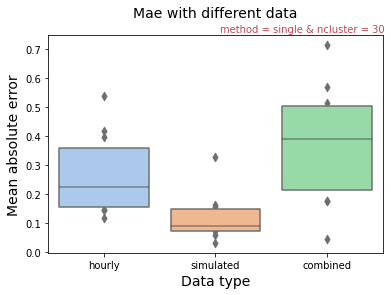

In [25]:
query_string = "method == 'single' and ncluster == 30"
p = sns.boxenplot(data=df.query(query_string),x='trial',y='mae_ex_tc',palette='pastel')
plt.title('Mae with different data',pad=18,fontdict={'size':14})
plt.text(s=query_string.replace("'","").replace("==","=").replace("and","&"),x=1.04,y=0.76,color='#c04851')
plt.xlabel('Data type',fontdict={'size':14})
plt.ylabel('Mean absolute error',fontdict={'size':14})

In [26]:
p.get_figure().savefig(
    '/home/jupyter-zyh/Gnhe/analysis/images/profile/Integer/mae_with_different_data_NE.png',
    dpi=300)